# Parameter sweep for manueverMotifs
## Aggressive trip in motorway - Lateral acceleration

### 28/02/2019

***

**Contents**

1. [Data and library imports](#section1)
    * Package imports
    * Global parameters (R = 0.1 ; alphabet_size = 5 ; adaptive_break_points = False)
2. [Parameter sweep - 2Hz](#section2)
    * 2 seconds windows & 4 letter sax words
    * 2 seconds windows & 2 letter sax words
    * 4 seconds windows & 4 letter sax words
    * 4 seconds windows & 2 letter sax words
3. [Parameter sweep - 4Hz](#section3)
    * 2 seconds windows & 4 letter sax words (*)
    * 2 seconds windows & 2 letter sax words (*)
4. [Parameter sweep - 10Hz](#section4)
    * 2 seconds windows & 4 letter sax words 
    * 2 seconds windows & 2 letter sax words (*)
    * 1 second windows & 2 letter sax words
5. [Summary table](#section5)
***

<a id='section1'></a>
## 1. Data and library imports

### Package imports

In [1]:
%load_ext autoreload
%autoreload 2

In [54]:
import time
import pandas as pd
from extendedMD.emd import find_motifs_from_emd
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import uah_utils
import motif_utils
import lat_viz

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Global parameters

In [4]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, os.pardir, 'data-uah/D6'))

R = 0.1
alphabet_size = 5
adaptive_break_points = False

lat_results_list = []

<a id='section2'></a>
## 2. Parameter sweep - 2Hz

In [5]:
freq_per_second = 2

### 2.1) 2 seconds windows & 4-letter sax words

In [6]:
paa_size = 4
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
ExtendedMD algorithm run in 2.87 minutes


1282

In [7]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cbcc],12082.94,0.01,4,29,0,0.000000,0,0.000000,0,0.000000
1,"[aaaa, aaab]",15370.67,0.07,5,5,3,0.600000,1,0.200000,1,0.200000
2,"[eeeb, eeba]",15773.56,0.05,5,4,0,0.000000,1,0.250000,0,0.000000
3,"[ceee, eeee]",16007.79,0.06,5,3,2,0.666667,1,0.333333,1,0.333333
4,"[aaaa, aaae, aaee, aeee, eeee, eeed]",16772.86,0.02,9,2,1,0.500000,0,0.000000,1,0.500000


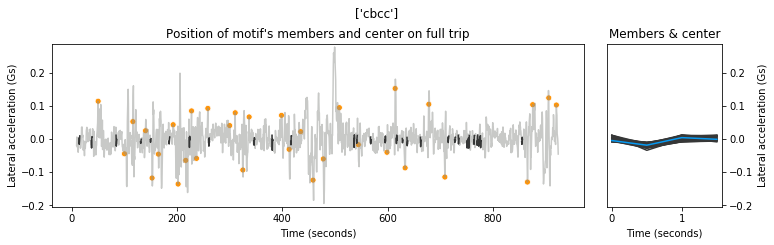

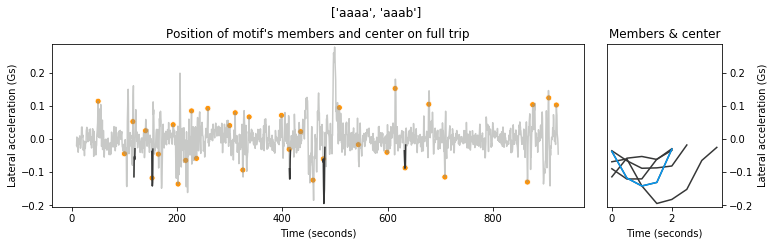

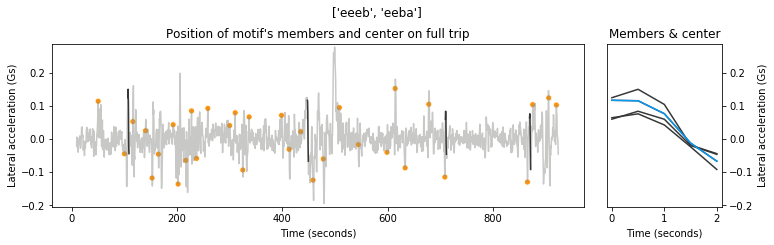

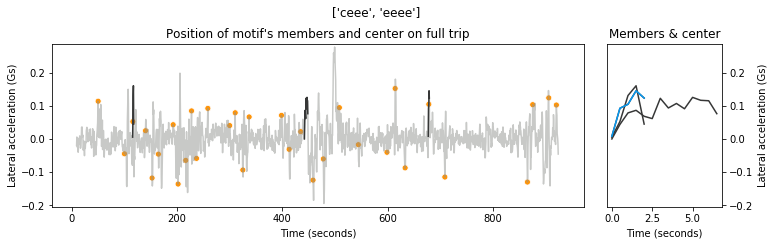

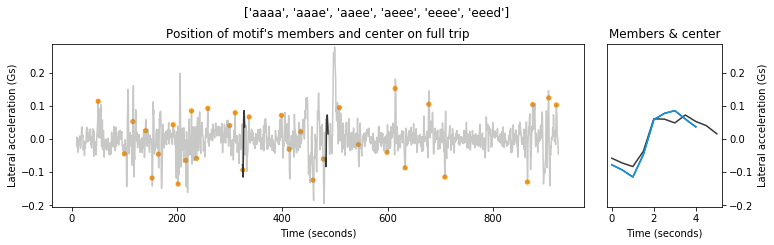

In [8]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [9]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,218,222,"['aaaa', 'aaab']",118.0,120.0
1,286,290,"['aaaa', 'aaab']",152.0,154.0
2,809,813,"['aaaa', 'aaab']",413.5,415.5
3,937,944,"['aaaa', 'aaab']",477.5,481.0
4,1246,1251,"['aaaa', 'aaab']",632.0,634.5
0,195,199,"['eeeb', 'eeba']",106.5,108.5
1,877,881,"['eeeb', 'eeba']",447.5,449.5
2,1402,1406,"['eeeb', 'eeba']",710.0,712.0
3,1722,1726,"['eeeb', 'eeba']",870.0,872.0
0,213,217,"['ceee', 'eeee']",115.5,117.5


In [10]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

### 2.2) 2 seconds windows &  2-letter sax words

In [11]:
paa_size = 2
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
ExtendedMD algorithm run in 2.14 minutes


912

In [12]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cb],8848.69,0.03,4,103,0,0.000000,4,0.038835,2,0.019417
1,"[be, ee]",14940.15,0.05,7,3,1,0.333333,0,0.000000,1,0.333333
2,"[da, ba, aa]",15416.71,0.05,13,3,2,0.666667,0,0.000000,1,0.333333


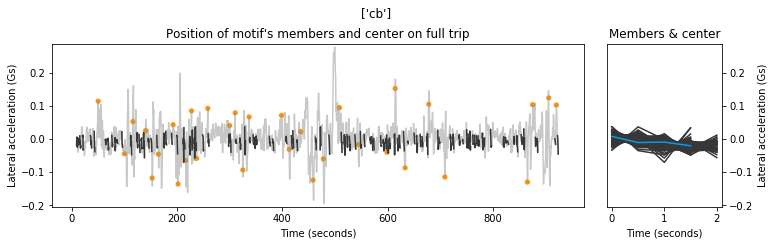

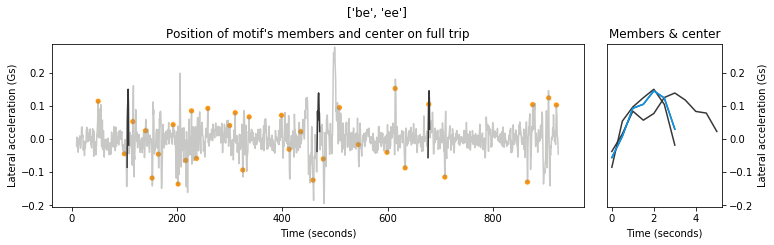

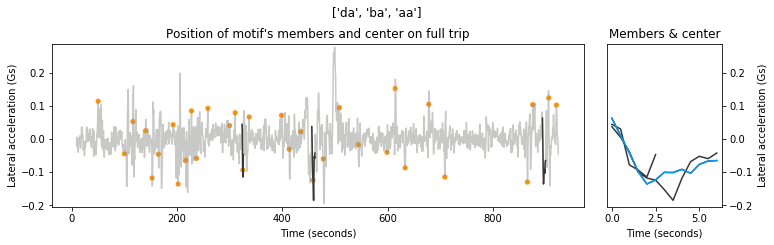

In [13]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [14]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,192,198,"['be', 'ee']",105.0,108.0
1,914,924,"['be', 'ee']",466.0,471.0
2,1336,1342,"['be', 'ee']",677.0,680.0
0,629,634,"['da', 'ba', 'aa']",323.5,326.0
1,894,906,"['da', 'ba', 'aa']",456.0,462.0
2,1771,1783,"['da', 'ba', 'aa']",894.5,900.5


In [15]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

### 2.3) 4 seconds windows & 4-letter sax words

In [16]:
paa_size = 4
win_size = freq_per_second * 4

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
ExtendedMD algorithm run in 1.62 minutes


683

In [17]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cbcc],11789.85,0.03,8,30,0,0.000000,0,0.0,0,0.00
1,[aaee],15921.51,0.05,8,4,2,0.500000,0,0.0,2,0.50
2,[eeec],16110.93,0.06,8,4,2,0.500000,0,0.0,1,0.25
3,[baaa],16608.92,0.04,8,3,1,0.333333,0,0.0,0,0.00


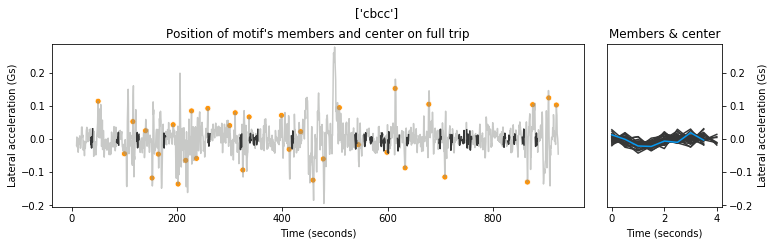

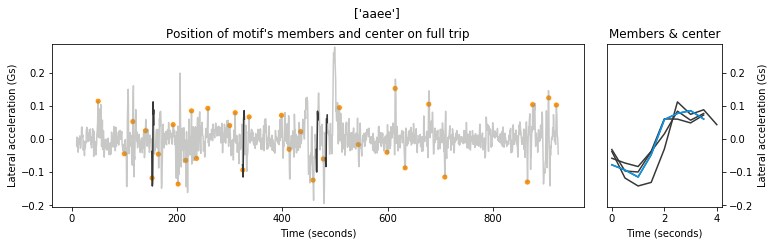

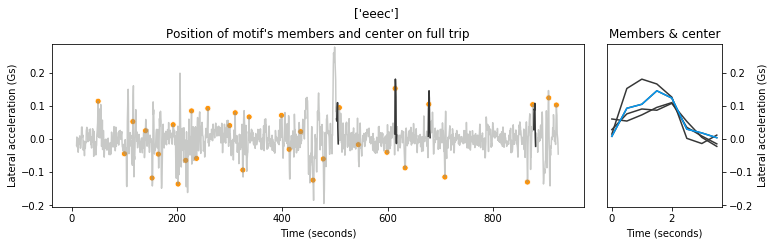

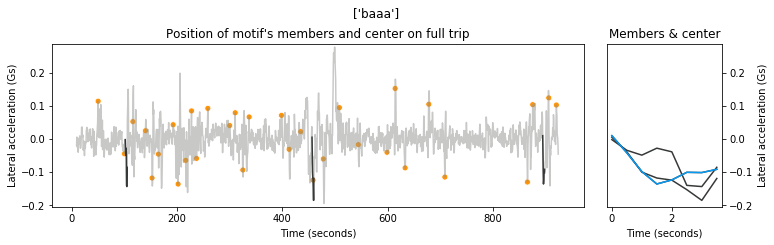

In [18]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [19]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,286,294,['aaee'],152.0,156.0
1,631,638,['aaee'],324.5,328.0
2,911,918,['aaee'],464.5,468.0
3,946,953,['aaee'],482.0,485.5
0,988,995,['eeec'],503.0,506.5
1,1210,1217,['eeec'],614.0,617.5
2,1337,1344,['eeec'],677.5,681.0
3,1738,1745,['eeec'],878.0,881.5
0,185,192,['baaa'],101.5,105.0
1,895,902,['baaa'],456.5,460.0


In [20]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

### 2.4) 4 seconds windows &  2-letter sax words

In [21]:
paa_size = 2
win_size = freq_per_second * 4

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
ExtendedMD algorithm run in 1.51 minutes


551

In [22]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cc],7575.19,0.05,9,70,2,0.028571,1,0.014286,3,0.042857
1,[aa],12677.83,0.07,13,7,3,0.428571,3,0.428571,0,0.000000
2,"[ee, ed, ec]",14877.78,0.05,15,2,1,0.500000,0,0.000000,0,0.000000
3,"[ab, ac, ab]",15263.35,0.05,11,2,0,0.000000,0,0.000000,0,0.000000


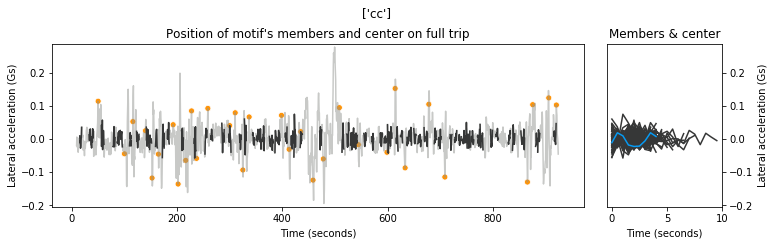

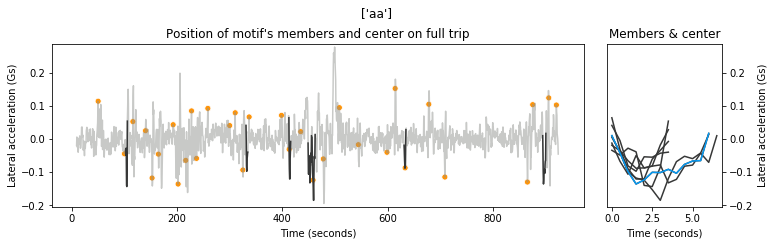

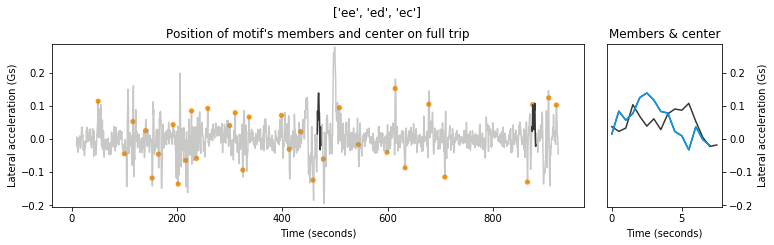

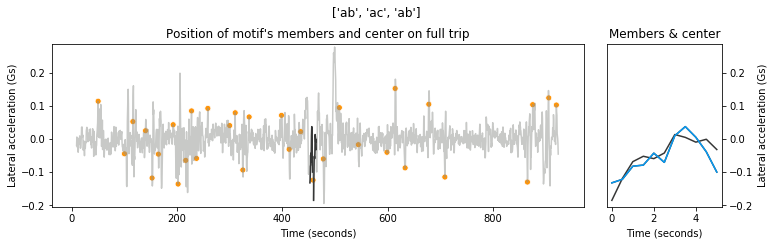

In [23]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [24]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,186,193,['aa'],102.0,105.5
1,644,651,['aa'],331.0,334.5
2,807,814,['aa'],412.5,416.0
3,880,893,['aa'],449.0,455.5
4,895,907,['aa'],456.5,462.5
5,1245,1252,['aa'],631.5,635.0
6,1772,1784,['aa'],895.0,901.0
0,915,929,"['ee', 'ed', 'ec']",466.5,473.5
1,1731,1746,"['ee', 'ed', 'ec']",874.5,882.0
0,887,897,"['ab', 'ac', 'ab']",452.5,457.5


In [25]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

<a id='section3'></a>
## 3. Parameter sweep - 4Hz

In [26]:
freq_per_second = 4

### 3.1) 2 seconds windows & 4-letter sax words

In [27]:
paa_size = 4
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
ExtendedMD algorithm run in 4.13 minutes


1668

In [28]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cccc],23821.21,0.04,8,56,1,0.017857,0,0.000000,1,0.017857
1,[deee],30022.03,0.07,8,16,5,0.312500,0,0.000000,1,0.062500
2,[aaaa],30112.61,0.07,10,14,6,0.428571,1,0.071429,2,0.142857
3,[eeba],32838.39,0.07,8,7,0,0.000000,2,0.285714,0,0.000000
4,"[aade, abee, adee]",33509.51,0.07,10,4,2,0.500000,0,0.000000,2,0.500000


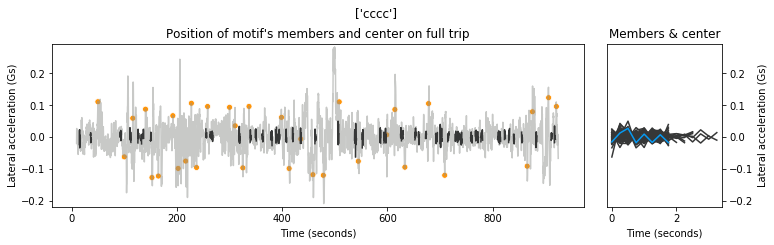

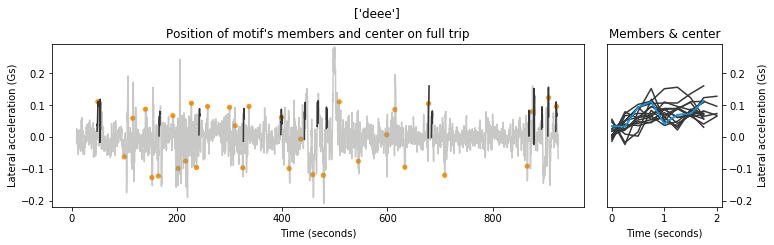

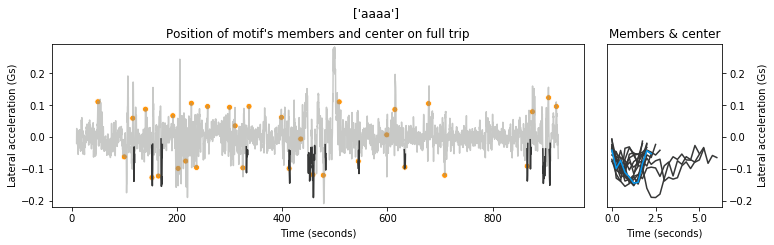

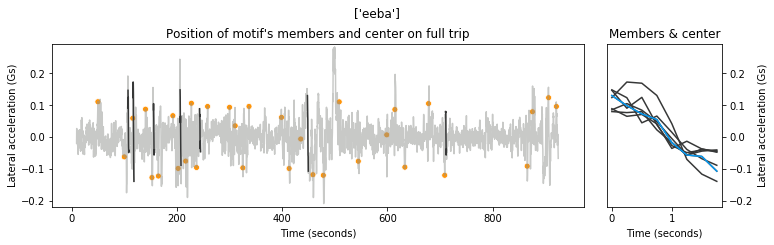

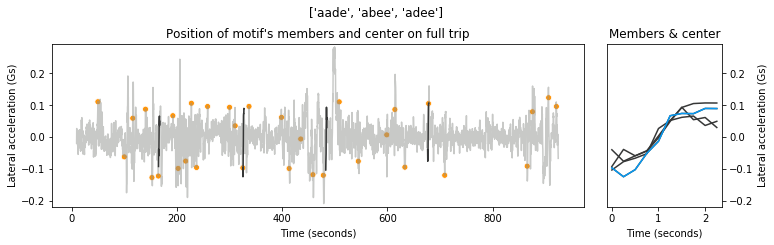

In [29]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [30]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,156,164,['deee'],48.25,50.25
1,176,183,['deee'],53.25,55.00
2,627,634,['deee'],166.00,167.75
3,930,937,['deee'],241.75,243.50
4,1268,1275,['deee'],326.25,328.00
5,1553,1561,['deee'],397.50,399.50
6,1732,1739,['deee'],442.25,444.00
7,1829,1836,['deee'],466.50,468.25
8,1898,1905,['deee'],483.75,485.50
9,2673,2680,['deee'],677.50,679.25


In [31]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

### 3.2) 2 seconds windows &  2-letter sax words

In [32]:
paa_size = 2
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
ExtendedMD algorithm run in 3.82 minutes


1158

In [33]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cc],15580.86,0.06,19,134,0,0.000,2,0.014925,1,0.007463
1,"[ca, ba, aa]",27387.55,0.07,12,10,5,0.500,5,0.500000,2,0.200000
2,"[ad, ae]",27775.49,0.07,10,8,5,0.625,0,0.000000,3,0.375000
3,"[ee, de, ee, ed]",32614.14,0.06,18,3,0,0.000,0,0.000000,0,0.000000
4,"[eb, ea, da, ca, ba]",33669.21,0.04,12,2,1,0.500,1,0.500000,0,0.000000
5,"[ee, ec]",34124.65,0.04,17,2,2,1.000,1,0.500000,0,0.000000


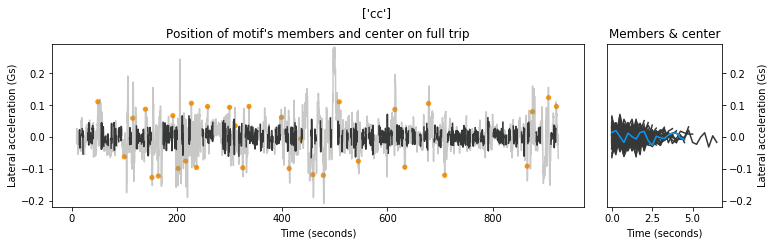

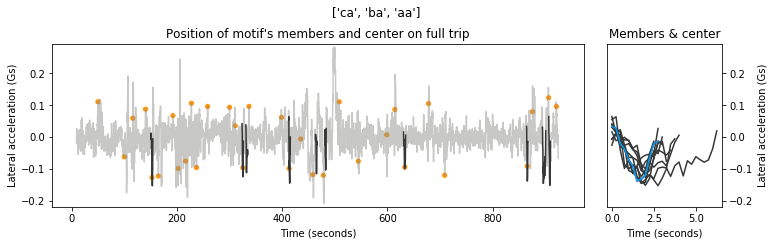

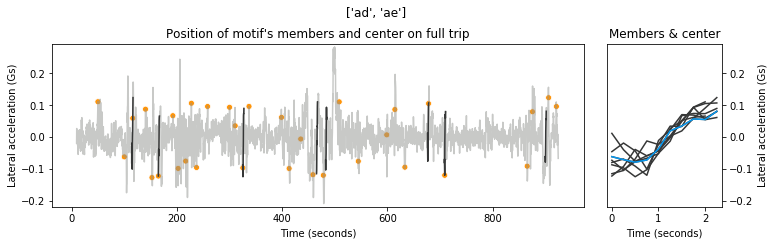

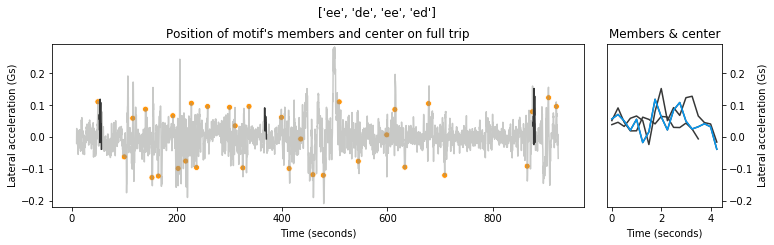

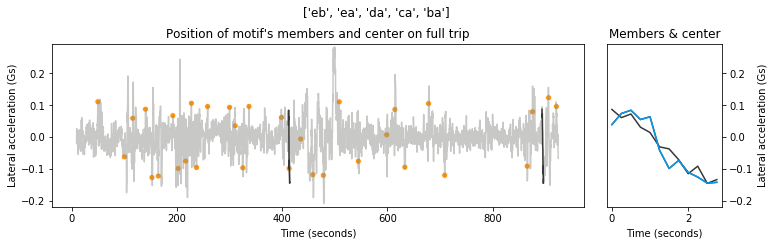

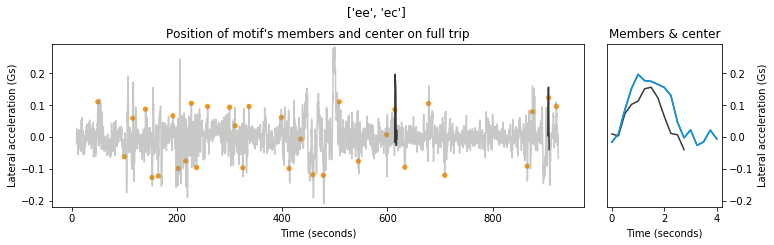

In [34]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [35]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,565,580,"['ca', 'ba', 'aa']",150.50,154.25
1,1258,1268,"['ca', 'ba', 'aa']",323.75,326.25
2,1287,1301,"['ca', 'ba', 'aa']",331.00,334.50
3,1613,1625,"['ca', 'ba', 'aa']",412.50,415.50
4,1816,1828,"['ca', 'ba', 'aa']",463.25,466.25
5,1887,1898,"['ca', 'ba', 'aa']",481.00,483.75
6,2486,2502,"['ca', 'ba', 'aa']",630.75,634.75
7,3421,3432,"['ca', 'ba', 'aa']",864.50,867.25
8,3542,3567,"['ca', 'ba', 'aa']",894.75,901.00
9,3590,3603,"['ca', 'ba', 'aa']",906.75,910.00


In [36]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

<a id='section4'></a>
## 4. Parameter sweep - 10Hz

In [37]:
freq_per_second = 10

### 4.1) 2 seconds windows &  4-letter sax words

In [38]:
paa_size = 4
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

1904

In [39]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[bbcc],56901.10,0.06,20,60,1,0.016667,0,0.000000,0,0.000000
1,[deee],75615.73,0.07,20,12,3,0.250000,0,0.000000,0,0.000000
2,[ddca],80385.97,0.07,21,6,1,0.166667,0,0.000000,0,0.000000
3,[adee],82647.75,0.06,21,5,1,0.200000,1,0.200000,2,0.400000
4,[eeda],84157.54,0.06,20,6,0,0.000000,2,0.333333,0,0.000000
5,"[ceee, deee, eeee]",89277.72,0.06,29,3,3,1.000000,1,0.333333,1,0.333333
6,"[caaa, baaa, aaaa, aaab, aaac, aaad]",90517.41,0.04,26,2,1,0.500000,0,0.000000,1,0.500000
7,"[beee, ceee, deee]",93199.40,0.03,24,2,2,1.000000,0,0.000000,1,0.500000
8,"[adaa, acaa, bbaa]",95894.52,0.05,22,2,1,0.500000,0,0.000000,1,0.500000


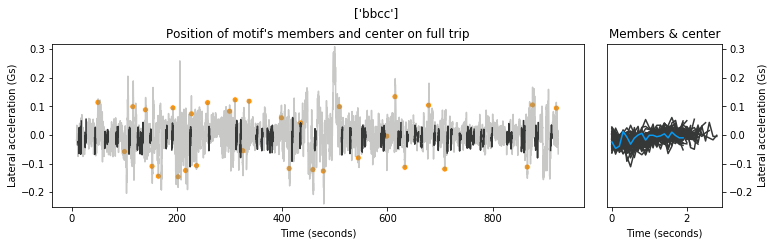

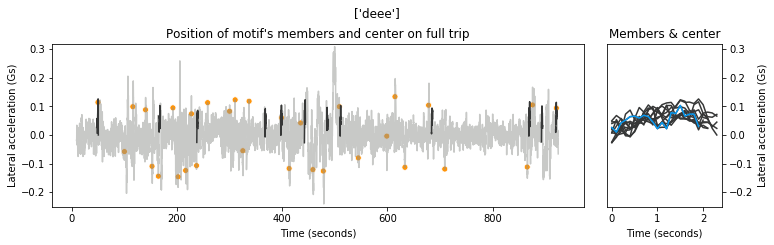

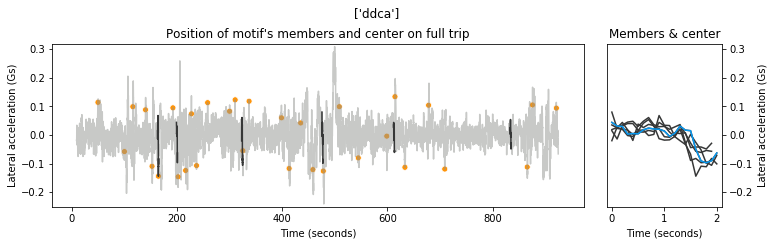

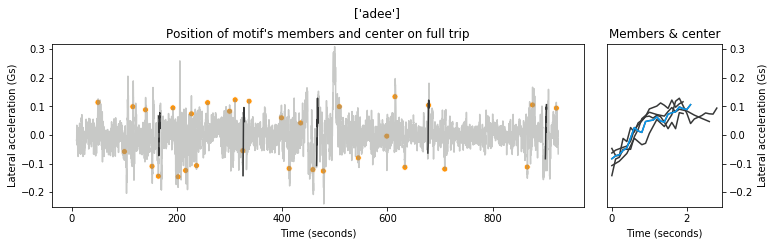

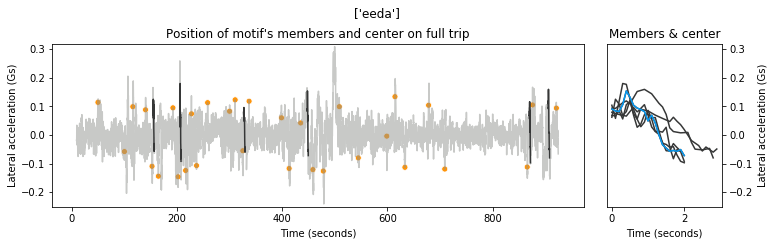

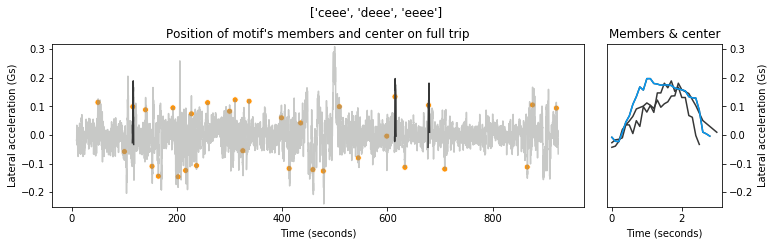

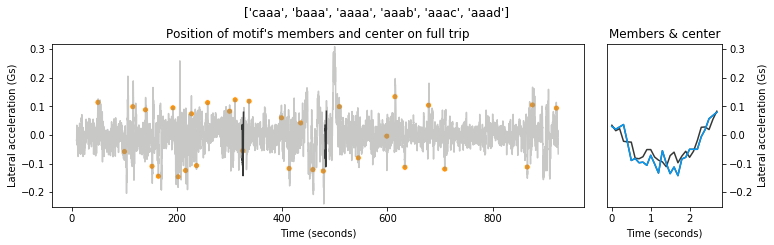

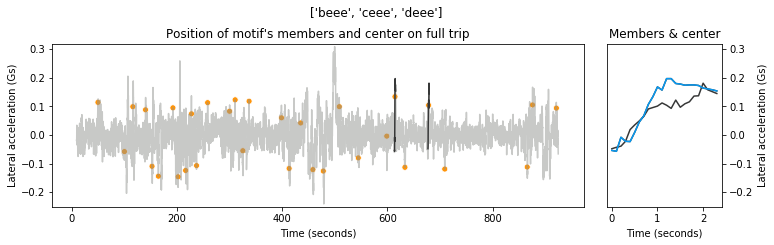

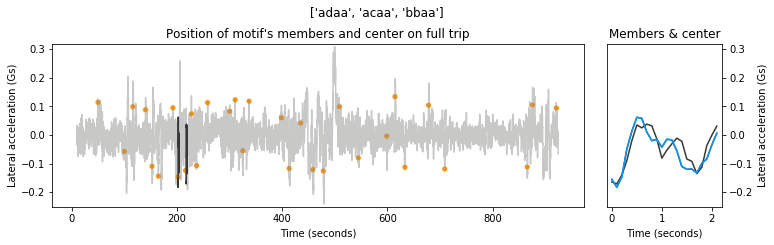

In [40]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [41]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,375,397,['deee'],48.2,50.5
1,1487,1506,['deee'],166.0,167.9
2,2175,2194,['deee'],237.7,240.0
3,3396,3417,['deee'],367.0,369.1
4,3684,3706,['deee'],397.4,399.7
5,4098,4117,['deee'],442.2,444.1
6,4503,4523,['deee'],484.6,486.6
7,4741,4762,['deee'],509.9,512.0
8,6379,6400,['deee'],683.8,685.9
9,8105,8127,['deee'],868.5,870.8


In [42]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

### 4.2) 2 seconds windows & 2-letter sax words

In [43]:
paa_size = 2
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

634

In [44]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cc],37424.26,0.08,22,106,1,0.009434,0,0.000000,2,0.018868
1,[eb],62000.45,0.07,24,10,0,0.000000,4,0.400000,1,0.100000
2,"[be, ce]",64597.81,0.08,23,8,2,0.250000,1,0.125000,3,0.375000
3,"[ca, ba]",67075.91,0.08,25,8,5,0.625000,4,0.500000,1,0.125000
4,"[ca, ba, aa, ab]",75775.33,0.06,34,3,2,0.666667,2,0.666667,0,0.000000
5,"[aa, ab, ac, ad, ae]",76899.46,0.05,35,2,1,0.500000,0,0.000000,1,0.500000
6,"[dc, cd, be]",77430.18,0.05,29,2,0,0.000000,1,0.500000,0,0.000000


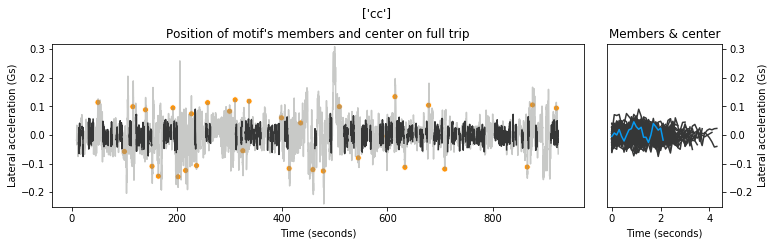

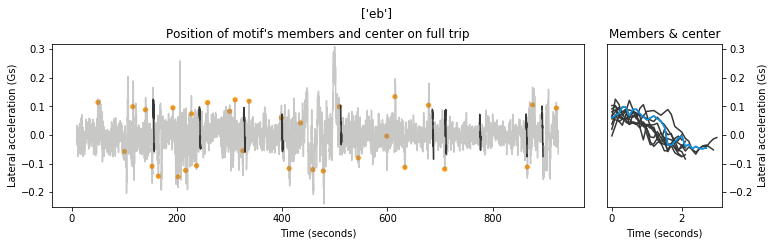

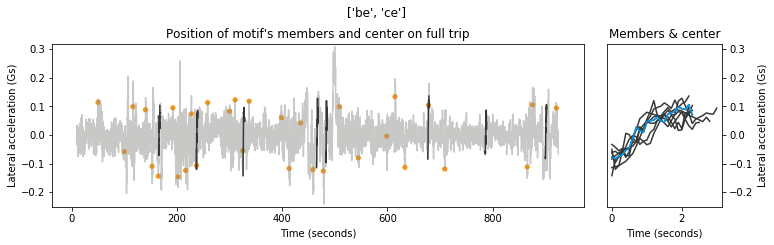

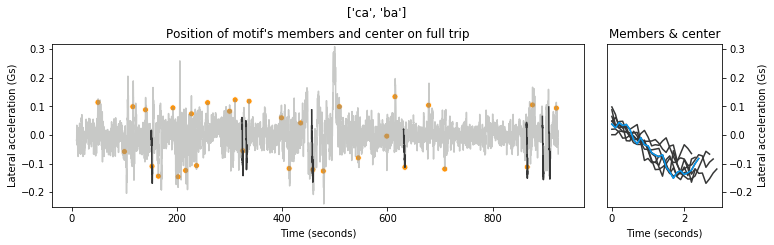

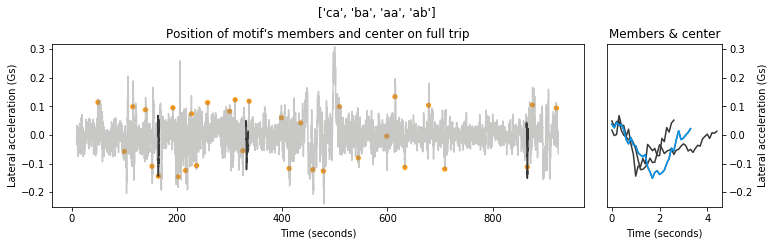

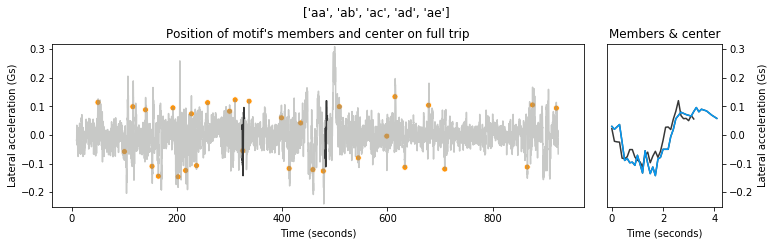

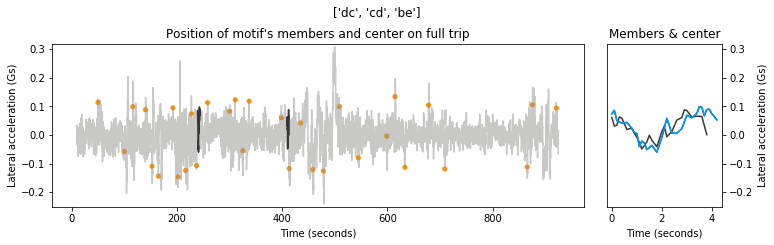

In [45]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [46]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,1387,1408,['eb'],154.9,157.0
1,2209,2232,['eb'],242.4,245.1
2,3018,3041,['eb'],327.0,330.0
3,3700,3720,['eb'],399.0,401.1
4,4753,4773,['eb'],511.1,513.1
5,6397,6418,['eb'],685.6,687.7
6,6617,6638,['eb'],709.4,712.3
7,7226,7246,['eb'],775.4,777.4
8,8056,8077,['eb'],863.6,865.7
9,8339,8359,['eb'],893.8,895.8


In [47]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

### 4.3) 1 second window & 2-letter sax words

In [48]:
paa_size = 2
win_size = freq_per_second * 1

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['ay'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
ExtendedMD algorithm run in 9.8 minutes


2089

In [49]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_turn_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,turn_events,turn_ratio,lc_right,lc_right_ratio,lc_left,lc_left_ratio
0,[cc],36145.20,0.06,12,223,1,0.004484,2,0.008969,1,0.004484
1,"[ab, ac, ad]",66454.15,0.07,14,14,0,0.000000,0,0.000000,2,0.142857
2,"[ed, ec, eb]",68547.90,0.07,13,12,0,0.000000,3,0.250000,0,0.000000
3,"[ee, de]",77738.74,0.06,14,5,1,0.200000,0,0.000000,0,0.000000
4,"[dc, db, ca, ba, aa, ab]",80442.17,0.06,44,3,1,0.333333,2,0.666667,0,0.000000
5,"[aa, ab, aa]",83694.93,0.04,17,2,1,0.500000,0,0.000000,0,0.000000
6,"[ba, aa, ac]",87274.82,0.05,21,2,0,0.000000,0,0.000000,0,0.000000


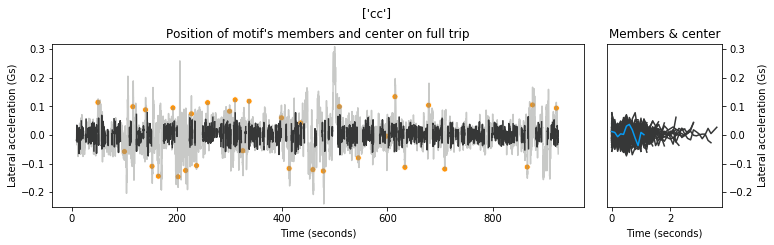

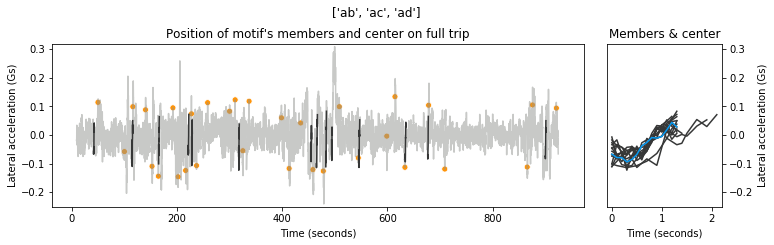

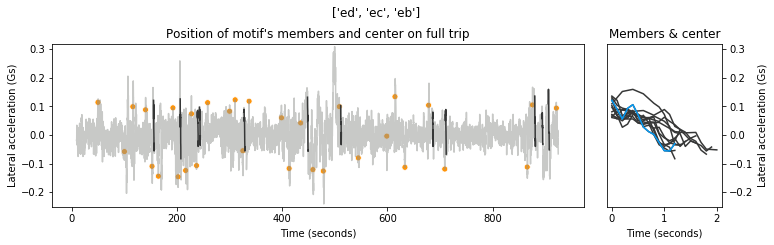

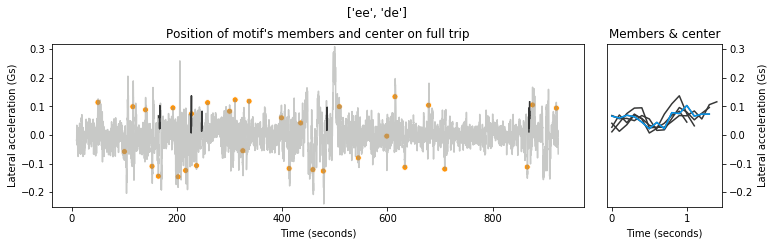

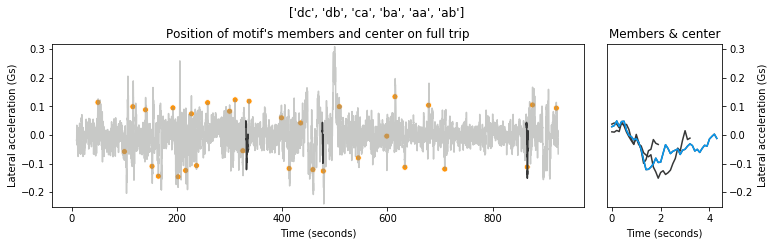

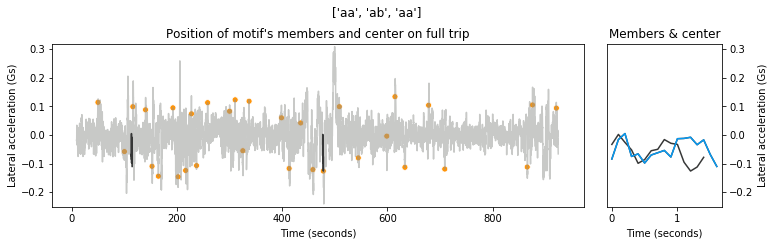

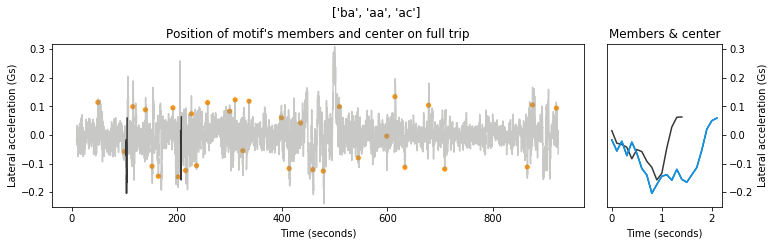

In [50]:
lat_viz.plot_k_lat_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [51]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,307,320,"['ab', 'ac', 'ad']",41.4,42.7
1,998,1011,"['ab', 'ac', 'ad']",114.6,115.9
2,1478,1491,"['ab', 'ac', 'ad']",165.1,166.4
3,2011,2024,"['ab', 'ac', 'ad']",221.2,222.5
4,2077,2090,"['ab', 'ac', 'ad']",227.8,229.2
5,2925,2938,"['ab', 'ac', 'ad']",317.2,318.5
6,4221,4234,"['ab', 'ac', 'ad']",454.6,455.9
7,4317,4330,"['ab', 'ac', 'ad']",464.9,467.0
8,4485,4498,"['ab', 'ac', 'ad']",482.8,484.1
9,4584,4596,"['ab', 'ac', 'ad']",493.8,495.1


In [52]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "lc_detection_rate": motif_utils.compute_lc_detection_rate(pruned_motif_dic_list, trip_df),
    "turn_detection_rate": motif_utils.compute_turn_detection_rate(pruned_motif_dic_list, trip_df),
    }
lat_results_list.append(results_dic)

<a id='section5'></a>
## 5. Summary table

In [55]:
pd.DataFrame(lat_results_list, columns=["freq_per_second", "paa_size", "win_size", "n_motifs",
                                        "n_prunned_motifs", "lc_detection_rate", "turn_detection_rate"])

,freq_per_second,paa_size,win_size,n_motifs,n_prunned_motifs,lc_detection_rate,turn_detection_rate
0,2,4,2.0,1282,5,0.230769,0.187500
1,2,2,2.0,912,3,0.307692,0.093750
2,2,4,4.0,683,4,0.115385,0.156250
3,2,2,4.0,551,4,0.269231,0.187500
4,4,4,2.0,1668,5,0.307692,0.406250
5,4,2,2.0,1158,6,0.461538,0.343750
6,10,4,2.0,1904,9,0.269231,0.322581
7,10,2,2.0,634,7,0.576923,0.290323
8,10,2,1.0,2089,7,0.346154,0.129032
